# The Sparks Foundation : Task #3
**Name:- Adep Yeman Ramprasad**

Ojective of Task:-

● Perform Exploratory Data Analysis on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.


**Step 1 = Import libraries and understanding the dataset**

In [9]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
#loading the given dataset
data= pd.read_csv("C:/Users/Yeman/Downloads/SampleSuperstore.csv")

In [14]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [15]:
#checking the no. of rows and column
data.shape

(9994, 13)

In [16]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [18]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

**Step 2 = Data Analysis and Data Cleaning**

In [24]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**No missing values in dataset**

In [27]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [30]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Here, country is only one unique value, hence can be dropped**

In [12]:
#checking the dataset
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
#deleting unwanted columns
c = ['Postal Code','Country']
data1 = data.drop(columns=c,axis=1)
data1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Step 3 = Data Visualization**

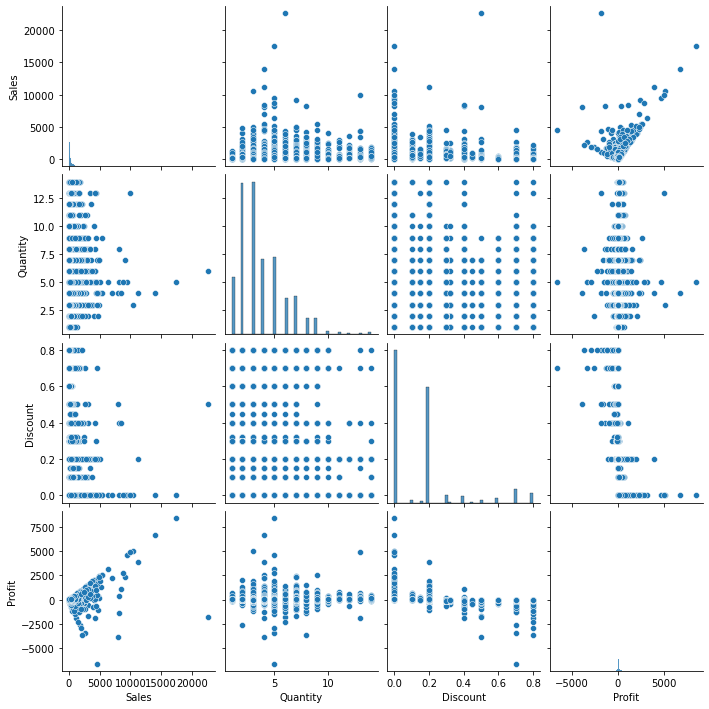

In [12]:
import seaborn as sns
sns.pairplot(data1)

**Finding the pairwise correlation between the columns visualizating using heatmap**

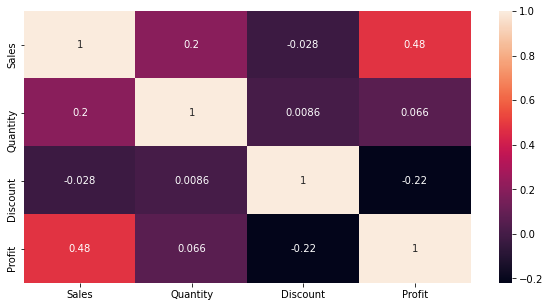

In [17]:
data1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(), annot=True)
plt.show()

**Visualizing Ship Modes**

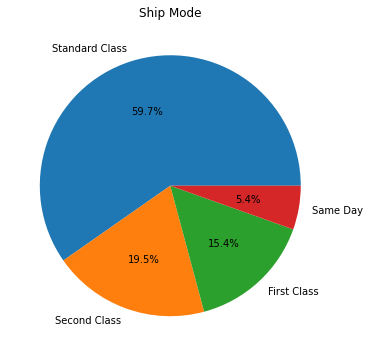

In [18]:
plt.figure(figsize=(6,6))
plt.title("Ship Mode")
plt.pie(data1['Ship Mode'].value_counts(), labels = data1['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()

**Visualizing the Categories**

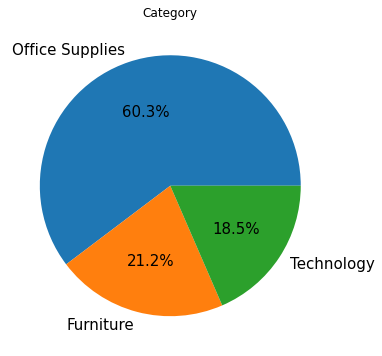

In [19]:
plt.figure(figsize=(6,6))
textprops = {"fontsize":15}
plt.title("Category")
plt.pie(data1['Category'].value_counts(), labels = data1['Category'].value_counts().index,autopct='%1.1f%%',textprops=textprops)
plt.show()

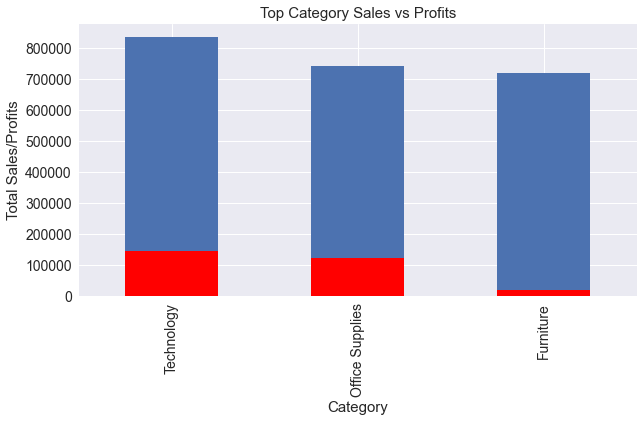

In [21]:
#computing top categories in terms of sales from initial observations(100)
top_category_sales = data1.groupby("Category").Sales.sum().nlargest(n=100)

#computing top categories in terms of profit from initial observations(100)
top_category_profit = data1.groupby("Category").Profit.sum().nlargest(n=100)

#plotting it
plt.style.use('seaborn')
top_category_sales.plot(kind= 'bar', figsize = (10,5),fontsize =14)
top_category_profit.plot(kind= 'bar', figsize = (10,5),fontsize =14, color='red')
plt.xlabel('Category',fontsize =15)
plt.ylabel('Total Sales/Profits',fontsize =15)
plt.title('Top Category Sales vs Profits',fontsize =15)
plt.show()


**Through Graph it is clear that Technology and Office Supplies have more sales and profit**

***Visualizing Sales vs Profits in diff sub categories***

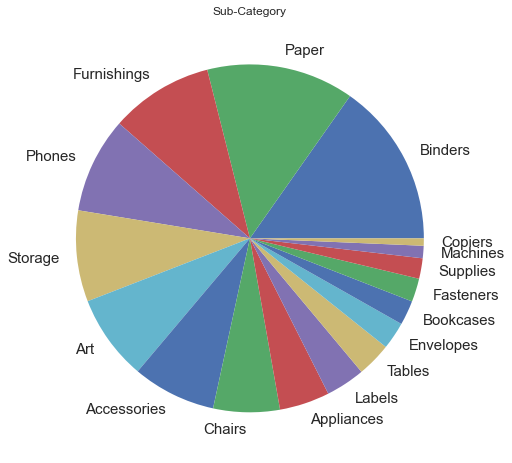

In [22]:
plt.figure(figsize=(8,8))
textprops = {"fontsize":15}
plt.title("Sub-Category")
plt.pie(data1['Sub-Category'].value_counts(), labels = data1['Sub-Category'].value_counts().index,textprops=textprops)
plt.show()

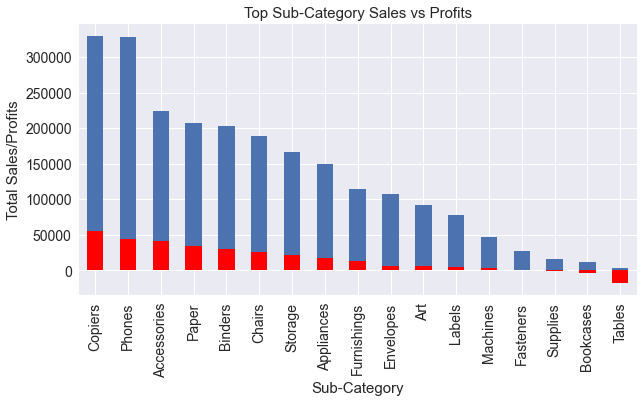

In [23]:
#computing top categories in terms of sales from initial observations(100)
top_category_sales = data1.groupby("Sub-Category").Sales.sum().nlargest(n=100)

#computing top categories in terms of profit from initial observations(100)
top_category_profit = data1.groupby("Sub-Category").Profit.sum().nlargest(n=100)

#plotting it
plt.style.use('seaborn')
top_category_sales.plot(kind= 'bar', figsize = (10,5),fontsize =14)
top_category_profit.plot(kind= 'bar', figsize = (10,5),fontsize =14, color='red')
plt.xlabel('Sub-Category',fontsize =15)
plt.ylabel('Total Sales/Profits',fontsize =15)
plt.title('Top Sub-Category Sales vs Profits',fontsize =15)
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

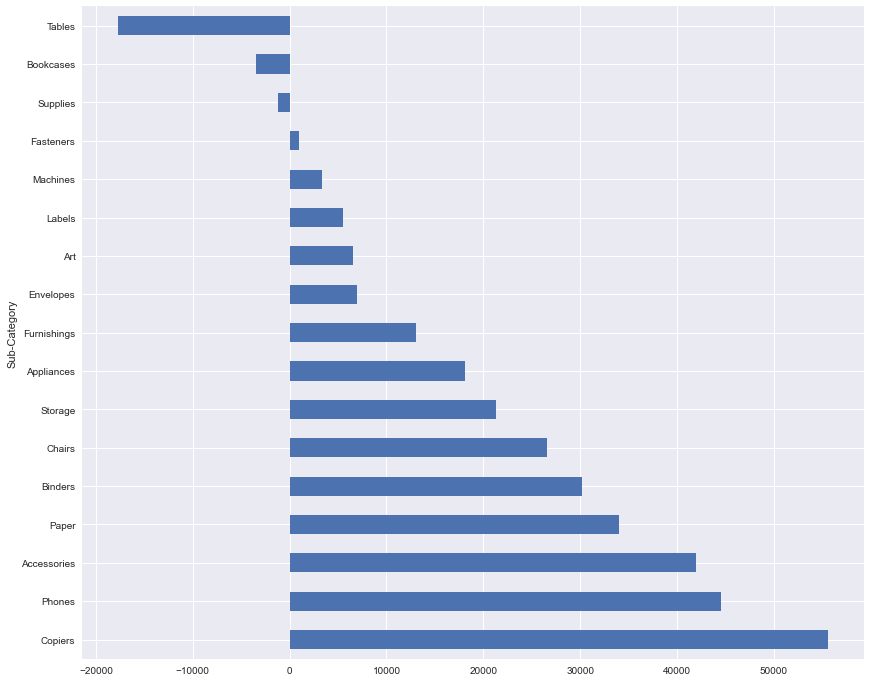

In [25]:
#for detailed view
plt.figure(figsize=(14,12))
statewise = data1.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

**by above graph, it is clear that Copiers and Phones sale is maximum and Tables is in minus**

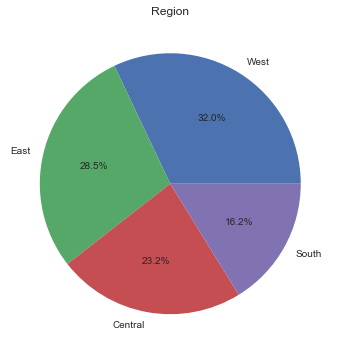

In [26]:
plt.figure(figsize=(6,6))
textprops = {"fontsize":15}
plt.title("Region")
plt.pie(data1['Region'].value_counts(), labels = data1['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

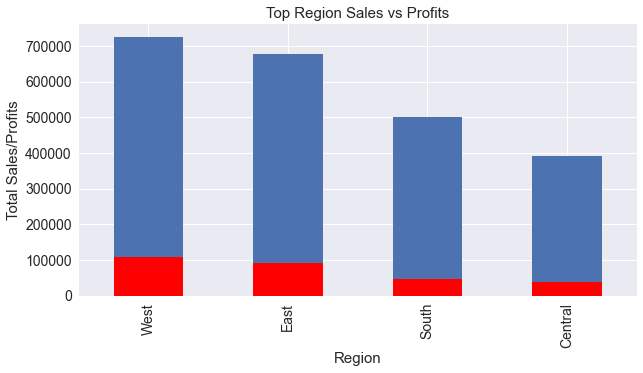

In [27]:
#computing top categories in terms of sales from initial observations(100)
top_category_sales = data1.groupby("Region").Sales.sum().nlargest(n=100)

#computing top categories in terms of profit from initial observations(100)
top_category_profit = data1.groupby("Region").Profit.sum().nlargest(n=100)

#plotting it
plt.style.use('seaborn')
top_category_sales.plot(kind= 'bar', figsize = (10,5),fontsize =14)
top_category_profit.plot(kind= 'bar', figsize = (10,5),fontsize =14, color='red')
plt.xlabel('Region',fontsize =15)
plt.ylabel('Total Sales/Profits',fontsize =15)
plt.title('Top Region Sales vs Profits',fontsize =15)
plt.show()

**Visualizing Sales vs Profit in diff States**

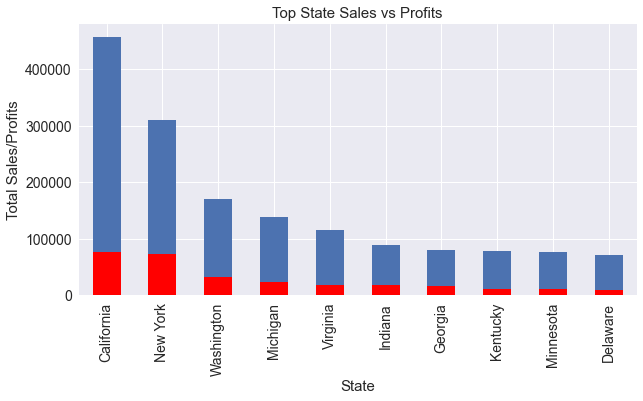

In [30]:
#computing top categories in terms of sales from initial observations(10)
top_category_sales = data1.groupby("State").Sales.sum().nlargest(n=10)

#computing top categories in terms of profit from initial observations(10)
top_category_profit = data1.groupby("State").Profit.sum().nlargest(n=10)

#plotting it
plt.style.use('seaborn')
top_category_sales.plot(kind= 'bar', figsize = (10,5),fontsize =14)
top_category_profit.plot(kind= 'bar', figsize = (10,5),fontsize =14, color='red')
plt.xlabel('State',fontsize =15)
plt.ylabel('Total Sales/Profits',fontsize =15)
plt.title('Top State Sales vs Profits',fontsize =15)
plt.show()

<AxesSubplot:ylabel='State'>

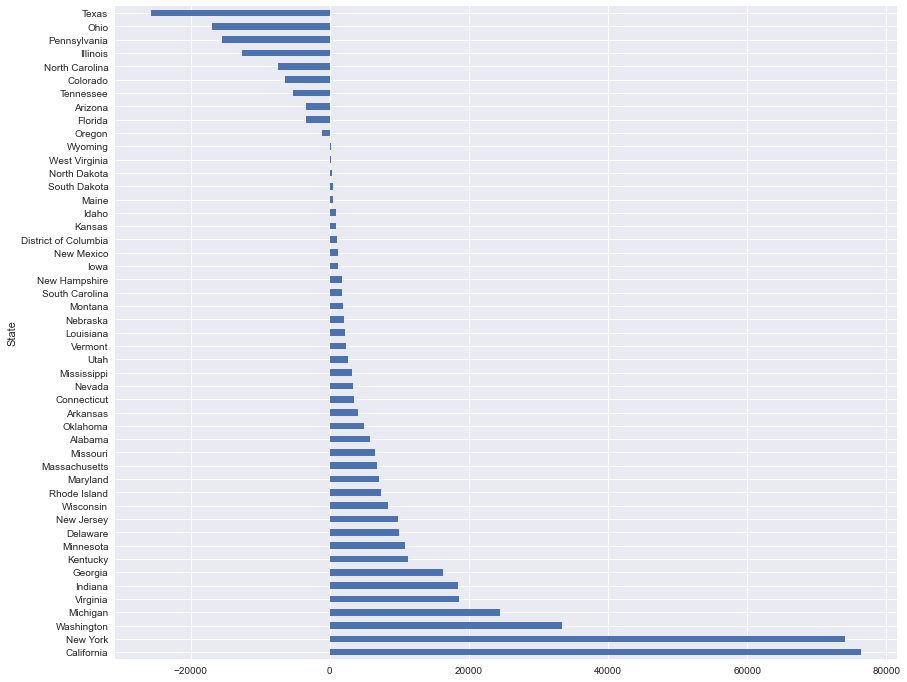

In [31]:
plt.figure(figsize=(14,12))
statewise = data1.groupby(['State'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

**By above graph it is clear that New York and California has maximum profits**

# **Checking the interdependency of Sales,Profit and Discounts**

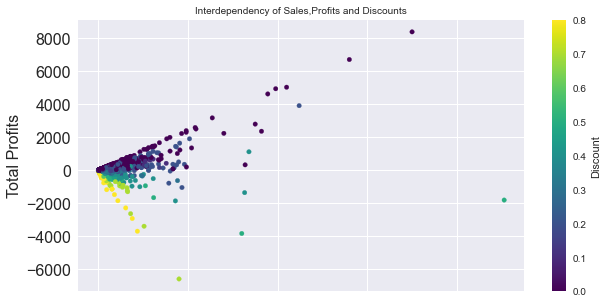

In [33]:
plt.style.use('seaborn')
data1.plot(kind= "scatter",figsize= (10,5), x="Sales", y="Profit", c= "Discount", s =20, fontsize = 16, colormap="viridis")
plt.ylabel('Total Profits', fontsize =16)
plt.title("Interdependency of Sales,Profits and Discounts", fontsize =10)
plt.show()

**Above graph clearly shows that when discount is more , sales are also more**

# Conclusion:-

**Areas where improvement is required to maximize the sales:**
1) We can limit the sale of Furniture and increase the Technology.

2) Work more on New York and California as Sales are more in this region and can make good profit.

3) With reference of sub categories , limit the sales of Tables.

4) Increase the sale in Eastern Region as Profit is more there.
